In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
data_arr = [(1,1),(2,2),(3,3),(4,4),(5,5),(6,6),(7,7),(8,8),(9,9),(10,100)]
data = np.array(data_arr)
print(data[:,0],data[:,1])

[ 1  2  3  4  5  6  7  8  9 10] [  1   2   3   4   5   6   7   8   9 100]


In [3]:
model = LinearRegression().fit(X=data[:,0].reshape(-1, 1),y=data[:,1].reshape(-1, 1))
mean_squared_error(model.predict(X=data[:,0].reshape(-1, 1)), data[:,1].reshape(-1, 1))

530.1818181818182

math
m = 5.909090909090909 
b = -18.0 
loss = 530.181818181818
sklearn
m = 5.90909090909091 
b = -18.000000000000007 
loss = 530.1818181818182


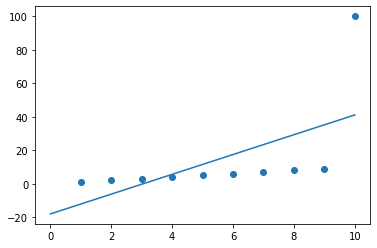

In [4]:
N = len(data)
E_x = np.mean(data[:,0])
E_y = np.mean(data[:,1])
E_y2= np.mean(data[:,1]**2)
E_xy = np.mean(data[:,0]*data[:,1])
E_x2 = np.mean(data[:,0]**2)
m = (E_x*E_y-E_xy)/(E_x**2-E_x2)
b = E_y-m*E_x
# L2 loss, math does not support L1 loss without storing datapoints
loss = E_y2 - 2 * (m * E_xy + b * E_y) + m**2 * E_x2 + 2 * m * b * E_x + b**2
print('math\nm =', m, '\nb =', b, '\nloss =', loss)
model = LinearRegression().fit(X=data[:,0].reshape(-1, 1),y=data[:,1].reshape(-1, 1))
model_m = model.coef_[0][0]
model_b = model.intercept_[0]
model_loss = mean_squared_error(model.predict(X=data[:,0].reshape(-1, 1)), data[:,1].reshape(-1, 1))
print('sklearn\nm =', model_m, '\nb =', model_b, '\nloss =', model_loss)
plt.scatter(x=data[:,0],y=data[:,1])
plt.plot(m*np.linspace(0,len(data),len(data)+1)+b)

In [5]:
# O(N) runtime algorithm to constantly update linear regression on adding data points
# only requires constant space to store E_x E_y E_xy E_x2 E_y2
# can also delete data points
# E_x = E_x*N/(N-1) - delete_x*1/(N-1)
import math
from random import random
for i in range(11,10000):
    N = i-1 # old N
    new_x = i
    new_y = math.floor(random()*100+i/50000)
    data_arr.append((new_x,new_y))
    data = np.array(data_arr)
    E_x = E_x*N/(N+1) + new_x*1/(N+1)
    E_y = E_y*N/(N+1) + new_y*1/(N+1)
    E_xy = E_xy*N/(N+1) + new_x*new_y*1/(N+1)
    E_x2 = E_x2*N/(N+1) + new_x*new_x*1/(N+1)
    E_y2 = E_y2*N/(N+1) + new_y*new_y*1/(N+1)
    m = (E_x*E_y-E_xy)/(E_x**2-E_x2)
    b = E_y-m*E_x
    loss = E_y2 - 2 * (m * E_xy + b * E_y) + m**2 * E_x2 + 2 * m * b * E_x + b**2
print('math\nm =', m, '\nb =', b, '\nloss =', loss)

model = LinearRegression().fit(X=data[:,0].reshape(-1, 1),y=data[:,1].reshape(-1, 1))
model_m = model.coef_[0][0]
model_b = model.intercept_[0]
model_loss = mean_squared_error(model.predict(X=data[:,0].reshape(-1, 1)), data[:,1].reshape(-1, 1))
print('sklearn\nm =', model_m, '\nb =', model_b, '\nloss =', model_loss)

math
m = 3.2584530707525315e-05 
b = 49.296823321059826 
loss = 845.9371032096656
sklearn
m = 3.258453070752187e-05 
b = 49.296823321059854 
loss = 845.9371032096556
